In [1]:
import random
import math
import matplotlib.pylab as pylab

In [2]:
def generate_random_numbers_in_range(n, r_start, r_end):
    random_numbers = list()
    for i in range(n):
        random_numbers.append(random.uniform(r_start, r_end))
    return random_numbers


def create_desired_output_list(n, X, V):
    desired_output_list = list()
    for i in range(n):
        desired_output_list.append(math.sin(20 * X[i]) + (3 * X[i]) + (V[i]))
    return desired_output_list


In [6]:
def back_propagation(N, M, X, W_hidden_l, W_output_l, B_hidden_l, D):  # Backpropogation_function
    eta = 0.01
    epoch = 0
    epochs_array = []
    mse_array = []
    output_neuron_bias = random.uniform(-1, 1)
    while(True):
        Y = list()  # Network output list
        for i in range(N):
            # Feed forward calculation
            input_x = X[i]
            V = list()  # hidden layer induced local field list
            hidden_l_output_list = list()
            output_l_inputs_and_weights = list()

            for j in range(M):
                v = (input_x * W_hidden_l[j]) + B_hidden_l[j]

                V.append(v)

                hidden_l_neuron_output = (math.tanh(v))

                hidden_l_output_list.append(hidden_l_neuron_output)

                temp = (hidden_l_neuron_output * W_output_l[j])

                output_l_inputs_and_weights.append(temp)
                
            yi = 0  # Network output
            for j in range(M):
                yi += output_l_inputs_and_weights[j]
            yi += output_neuron_bias
            Y.append(yi)

            # Back propagation of network
            for j in range(M):
                error_derivative = (-2 * (D[i] - yi))     # output error derivative
                transfer_derivative = (1 - math.pow((math.tanh(V[j])), 2))    # transfer derivative of hidden layer neuron
                W_hidden_l[j] = W_hidden_l[j] - (eta * error_derivative * transfer_derivative * input_x * W_output_l[j])    # hidden layer neuron weight update
                B_hidden_l[j] = B_hidden_l[j] - (eta * error_derivative * transfer_derivative * W_output_l[j])   # hidden layer neuron bias update
                W_output_l[j] = W_output_l[j] - (eta * error_derivative * hidden_l_output_list[j])   # output neuron weight update
            output_neuron_bias = output_neuron_bias - (eta * error_derivative)
        epoch = epoch + 1
        epochs_array.append(epoch)
        mse = 0
        for i in range(N):
            mse = mse + math.pow((D[i] - Y[i]), 2)
        mse = mse / N
        mse_array.append(mse)
        #print("Epoch: ", epoch, "  MSE: ", mse)
        if (mse < 0.01):
            break
            
    print("Last Epoch No: ", epoch, "  MSE: ", mse)
#     print("Network output list:", Y)
#     print(" ")
#     print("Hidden layer weights: ", W_hidden_l)
#     print(" ")
#     print("Hidden layer biases: ", B_hidden_l)
#     print(" ")
#     print("Output neuron weights: ", W_output_l)
#     print(" ")
    plot_input_vs_desired_output_graph(X, D)
    plot_input_output_curve_fit_graph(X, Y)
    plot_epoch_vs_mse_graph(epochs_array, mse_array)


In [7]:
def plot_input_vs_desired_output_graph(X, D):
    pylab.plot(X, D, 'ro')


def plot_input_output_curve_fit_graph(X, Y):
    pylab.title("Input Output Curve Fitting on Desired Output")
    pylab.plot(X, Y, 'bo')
    pylab.show()


def plot_epoch_vs_mse_graph(epoch, mse):
    pylab.title("Epoch VS MSE")
    pylab.plot(epoch, mse, 'o-')
    pylab.show()

Last Epoch No:  1605   MSE:  0.009997314620223715


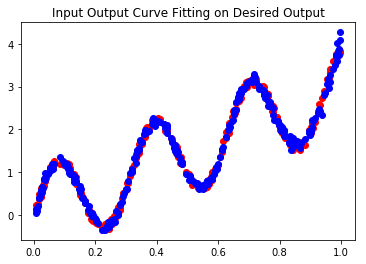

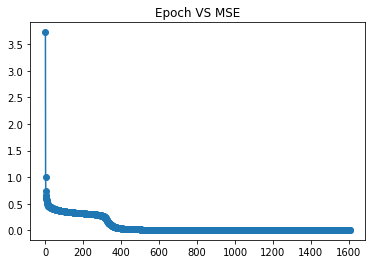

In [8]:
n = 300  # Number of inputs
m = 24  # Number of neurons in hidden layer

X = generate_random_numbers_in_range(n, 0, 1)   # Generates inputs X
V = generate_random_numbers_in_range(n, -1/10, 1/10)  # Generates V
D = create_desired_output_list(n, X, V)  # Calculating desired outputs with IO Relationship

# Generating hidden layer weights and bias and output layer weights
W_hidden_layer = generate_random_numbers_in_range(m, -10, 10)
W_output_layer = generate_random_numbers_in_range(m, -10, 10)
B_hidden_layer = generate_random_numbers_in_range(m, -5, 5)

back_propagation(n, m, X, W_hidden_layer, W_output_layer, B_hidden_layer, D)